In [ ]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")

# STAGE 1
## Ellen fixed good conditions, aadya varying through all combinations

### import data and visualise the target variable

[1] "list"

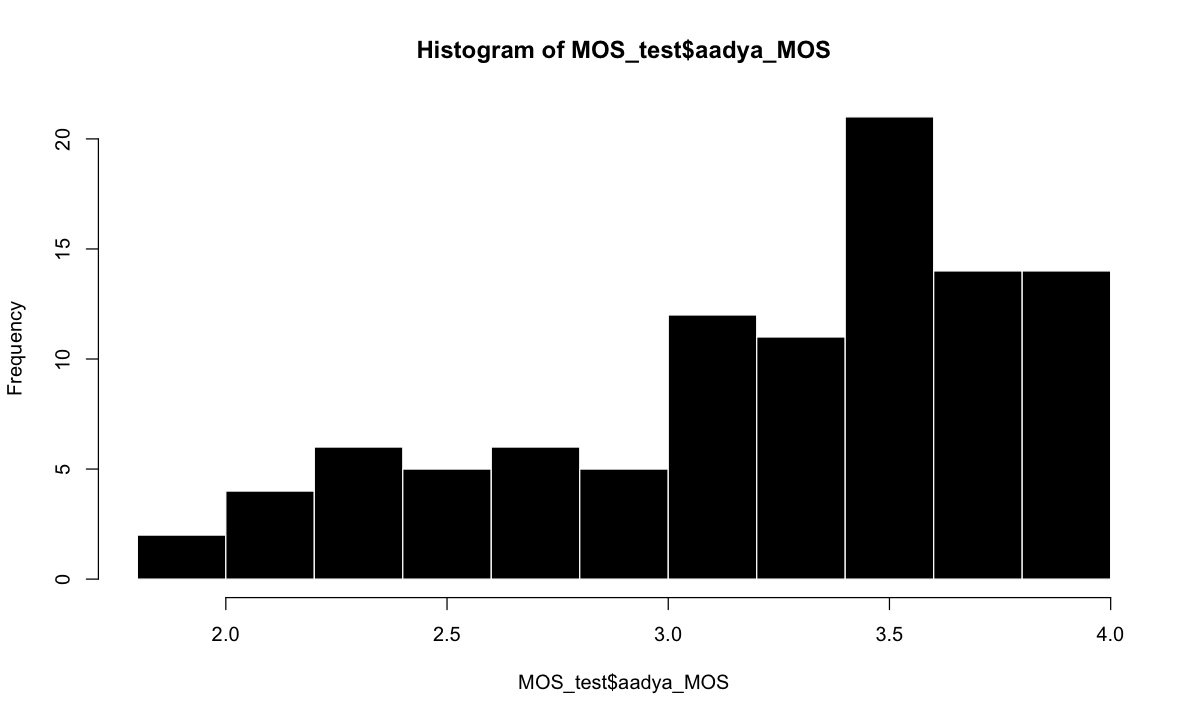

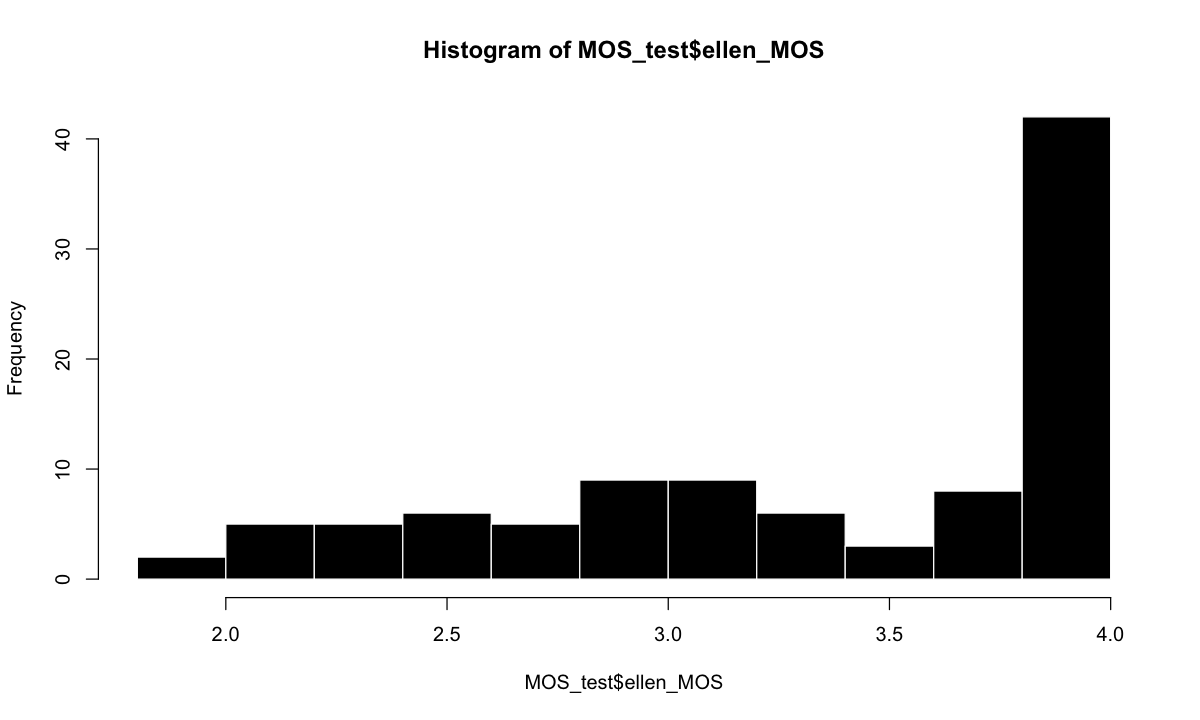

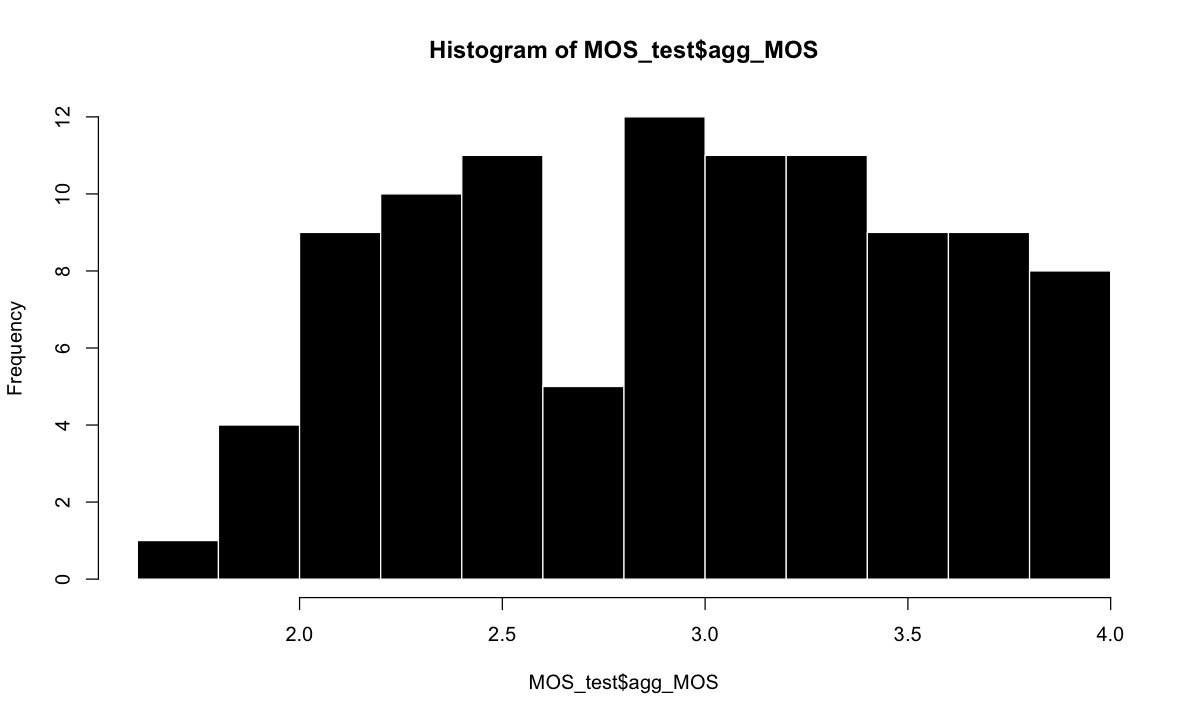

In [4]:
(list=ls()) #clears the workspace
#import dataset
#REPLACE WITH THE FILEPATH OF THE OUTPUT FROM MOS
MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_1/stage1_regression_table.csv") 
target = MOS_test$agg_MOS #make sure column header matches
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")
hist(MOS_test$aadya_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(MOS_test$ellen_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(MOS_test$agg_MOS, 
     col = "black",
     border = "white")

Scatter plots against predictors

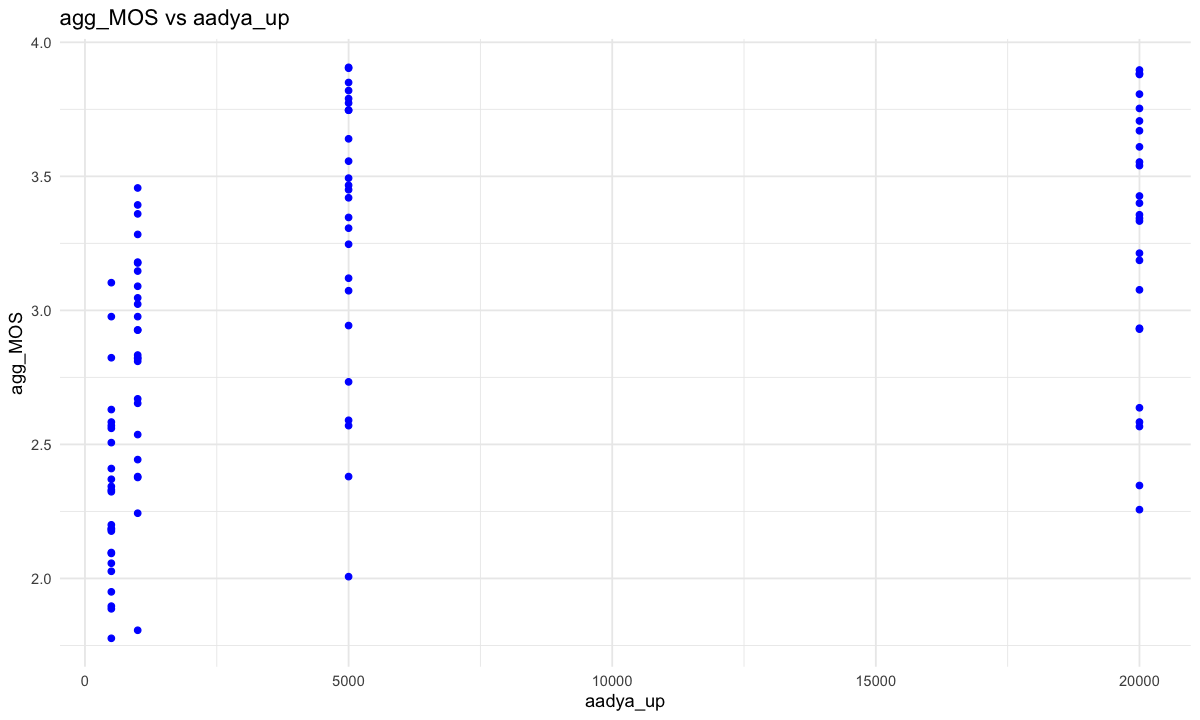

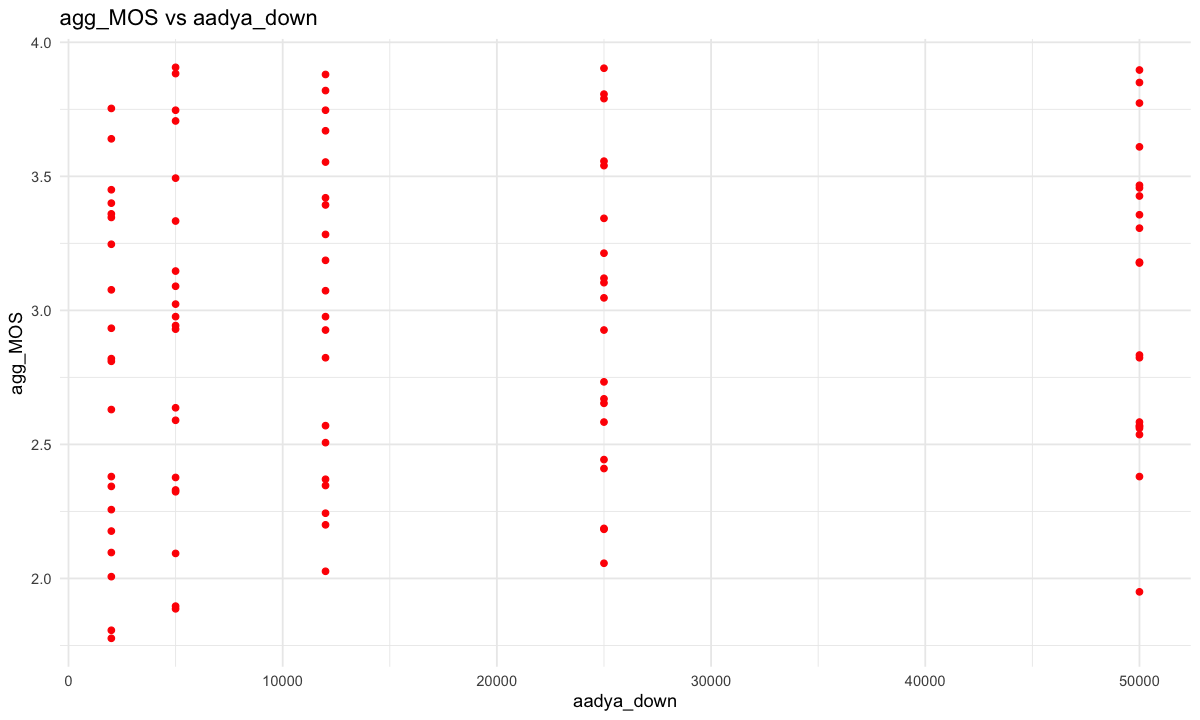

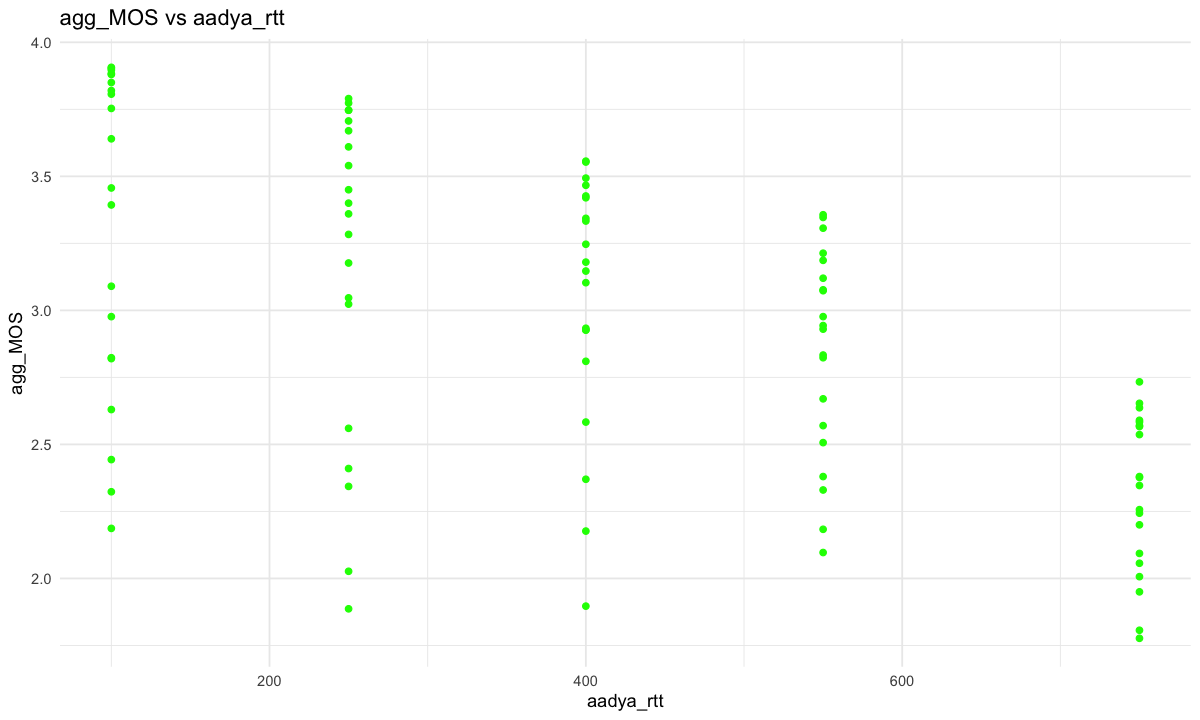

In [5]:
library(ggplot2)
library(cowplot)
library(IRdisplay)
options(repr.plot.width = 10, repr.plot.height = 6)

# Scatter plot for agg_MOS vs aadya_up
ggplot(MOS_test, aes(x = aadya_up, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "agg_MOS vs aadya_up", x = "aadya_up", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_down
ggplot(MOS_test, aes(x = aadya_down, y = agg_MOS)) +
  geom_point(color = "red") +
  labs(title = "agg_MOS vs aadya_down", x = "aadya_down", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_rtt
ggplot(MOS_test, aes(x = aadya_rtt, y = agg_MOS)) +
  geom_point(color = "green") +
  labs(title = "agg_MOS vs aadya_rtt", x = "aadya_rtt", y = "agg_MOS") +
  theme_minimal()

# Simple linear regression 

## fits a linear regression to the data
stores it in the var fit <br>
dependent var: AGG_MOS <br>
predictor vars: up, down, rtt <br>

In [6]:
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_1/stage1_regression_table_with_repeats.csv") 
fit <- lm((agg_MOS) ~ log(aadya_up) + log(aadya_down) + aadya_rtt, MOS_test)
summary(fit)


Call:
lm(formula = (agg_MOS) ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7222 -0.2741  0.0731  0.3943  1.0016 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.0990337  0.3331992   3.298  0.00109 ** 
log(aadya_up)    0.2317688  0.0231369  10.017  < 2e-16 ***
log(aadya_down)  0.0636046  0.0290860   2.187  0.02954 *  
aadya_rtt       -0.0014413  0.0001463  -9.852  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5744 on 296 degrees of freedom
Multiple R-squared:  0.4059,	Adjusted R-squared:  0.3998 
F-statistic:  67.4 on 3 and 296 DF,  p-value: < 2.2e-16


## Perform prediction
performs prediction based on the fit from above <br>
and plots it against the actual MOS scores <br>

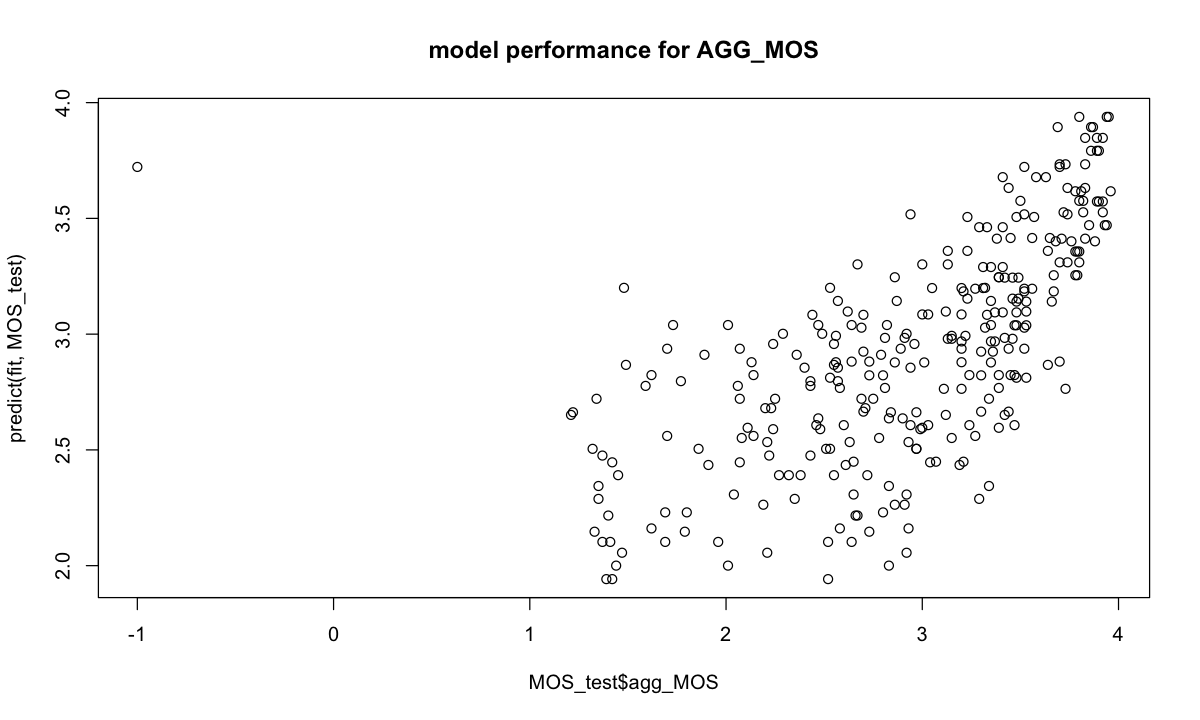

In [7]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
predictions <- predict(fit, MOS_test)
plot( MOS_test$agg_MOS, predict(fit, MOS_test),main="model performance for AGG_MOS")
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line

plots residuals- there should be no trend. If there is a trend then it means something non-linear is happening

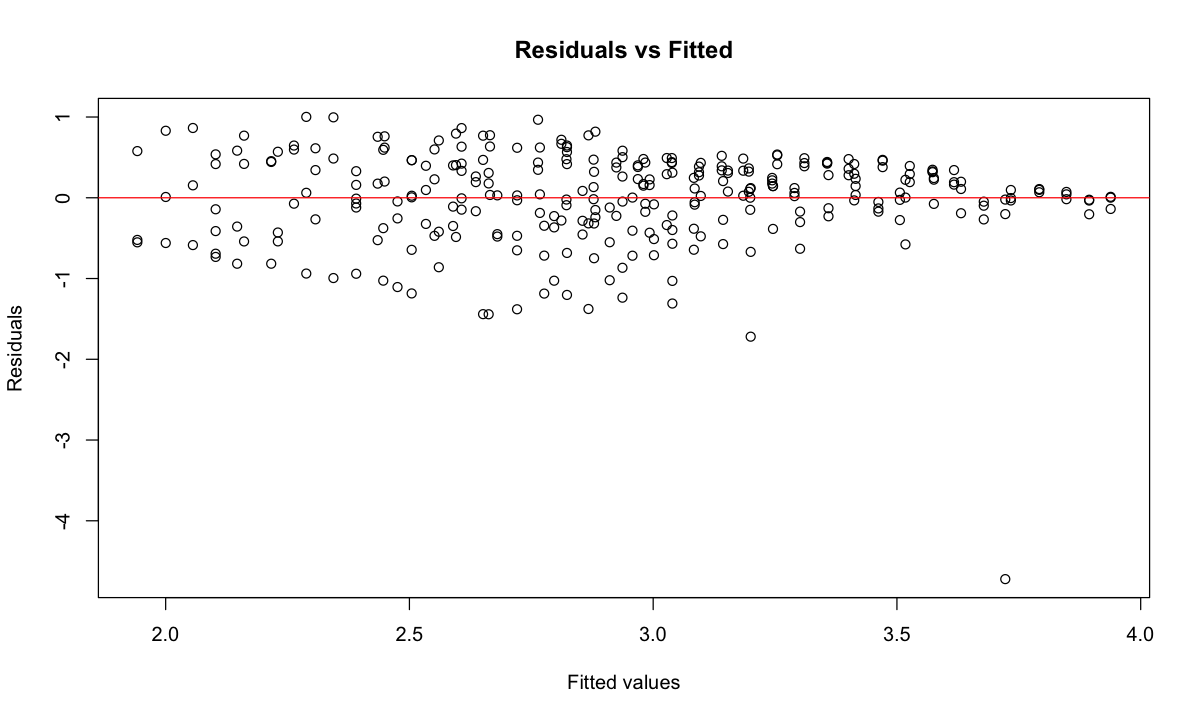

In [8]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
plot(fit$fitted.values, resid(fit), 
     main = "Residuals vs Fitted", 
     xlab = "Fitted values", 
     ylab = "Residuals")
abline(h = 0, col = "red")

Mean squared error

In [9]:
# Calculate the squared errors
squared_errors <- (predictions - target)^2
# Calculate MSE
mse <- mean(squared_errors)
# Print MSE
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 0.4088919 


In [10]:
subset <- MOS_test[, c("aadya_up", "aadya_down", "aadya_rtt")]
correlation_matrix <- cor(subset)
print(correlation_matrix)

           aadya_up aadya_down aadya_rtt
aadya_up          1          0         0
aadya_down        0          1         0
aadya_rtt         0          0         1


# box-cox transformation?

In [11]:
install.packages("car")
library(car)


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpxUpKxr/downloaded_packages


Loading required package: carData



In [12]:
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_1/stage1_regression_table_with_repeats.csv") 
basic_model <- lm(agg_MOS ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
par(bg = "white")  # set background color to white
boxcox(basic_model)

ERROR: Error in boxcox(basic_model): could not find function "boxcox"



Call:
lm(formula = transformed_var ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5302 -0.7121  0.0786  0.8628  2.3262 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.467e-01  3.749e-01   0.925  0.35584    
log(aadya_up)  5.572e-01  4.381e-02  12.719  < 2e-16 ***
aadya_down     1.032e-05  3.596e-06   2.869  0.00442 ** 
aadya_rtt     -3.537e-03  2.763e-04 -12.803  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.084 on 295 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5294,	Adjusted R-squared:  0.5247 
F-statistic: 110.6 on 3 and 295 DF,  p-value: < 2.2e-16


Mean Squared Error (MSE): 1.15935 


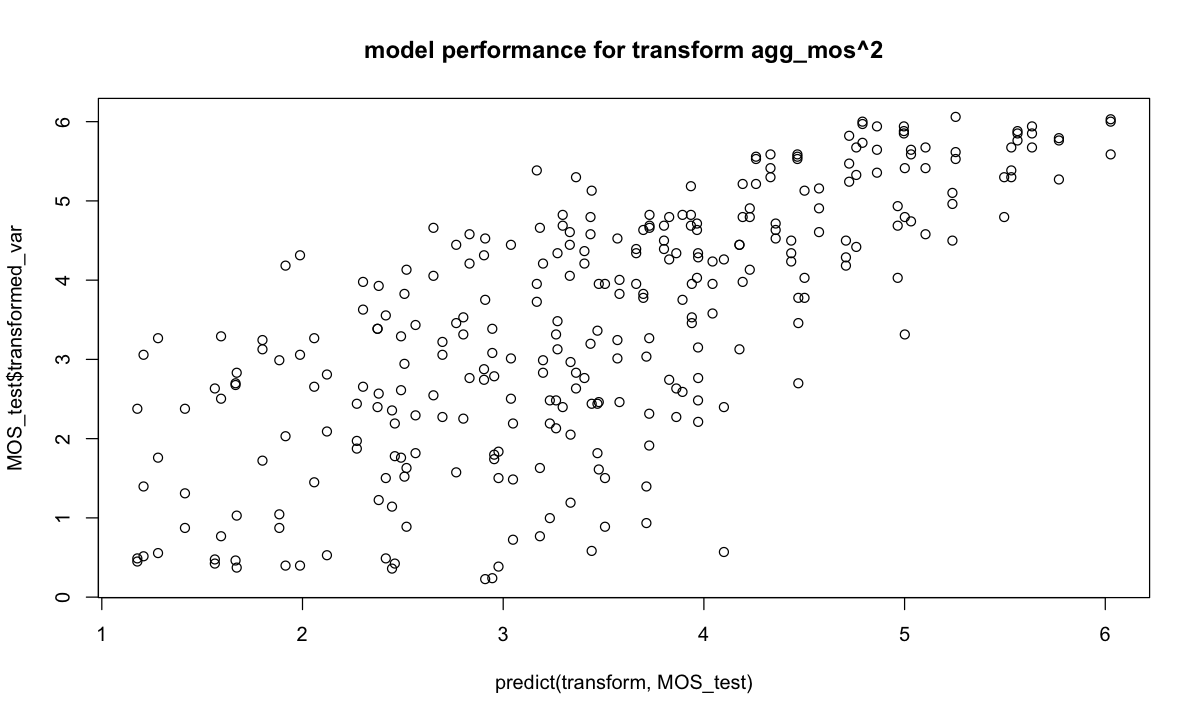

In [13]:
lambda <- 1.8
MOS_test$transformed_var <- (MOS_test$agg_MOS^lambda - 1) / lambda
transform <- lm(transformed_var ~ log(aadya_up) + aadya_down + aadya_rtt, MOS_test)
summary(transform)
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
predictions <- predict(transform, MOS_test)
plot(predict(transform, MOS_test) , MOS_test$transformed_var, main="model performance for transform agg_mos^2")
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line
# Calculate the squared errors
squared_errors <- (predictions - MOS_test$transformed_var)^2
# Calculate MSE
mse <- mean(squared_errors, na.rm = TRUE)
# Print MSE
cat("Mean Squared Error (MSE):", mse, "\n")

In [14]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("//Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_1/stage1_regression_table_with_repeats.csv") 
  #perform fit
  fit <- lm(target ~ log(aadya_up) + aadya_down + aadya_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)



  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}

# Execution cells for fitting and plotting


Call:
lm(formula = target ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8087 -0.2111  0.0644  0.4250  1.2738 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.802e-01  2.274e-01   1.232    0.219    
log(aadya_up)  3.517e-01  2.655e-02  13.246   <2e-16 ***
aadya_down     3.006e-06  2.175e-06   1.382    0.168    
aadya_rtt     -4.196e-04  1.679e-04  -2.499    0.013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6592 on 296 degrees of freedom
Multiple R-squared:  0.3828,	Adjusted R-squared:  0.3766 
F-statistic:  61.2 on 3 and 296 DF,  p-value: < 2.2e-16



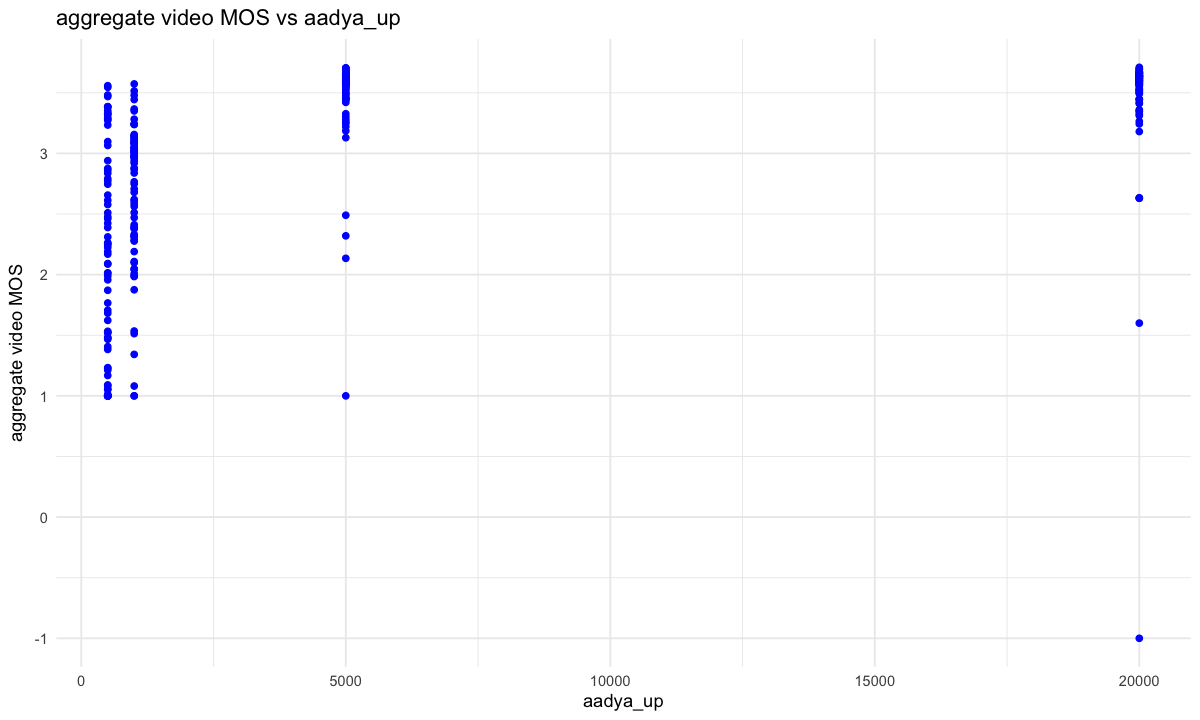

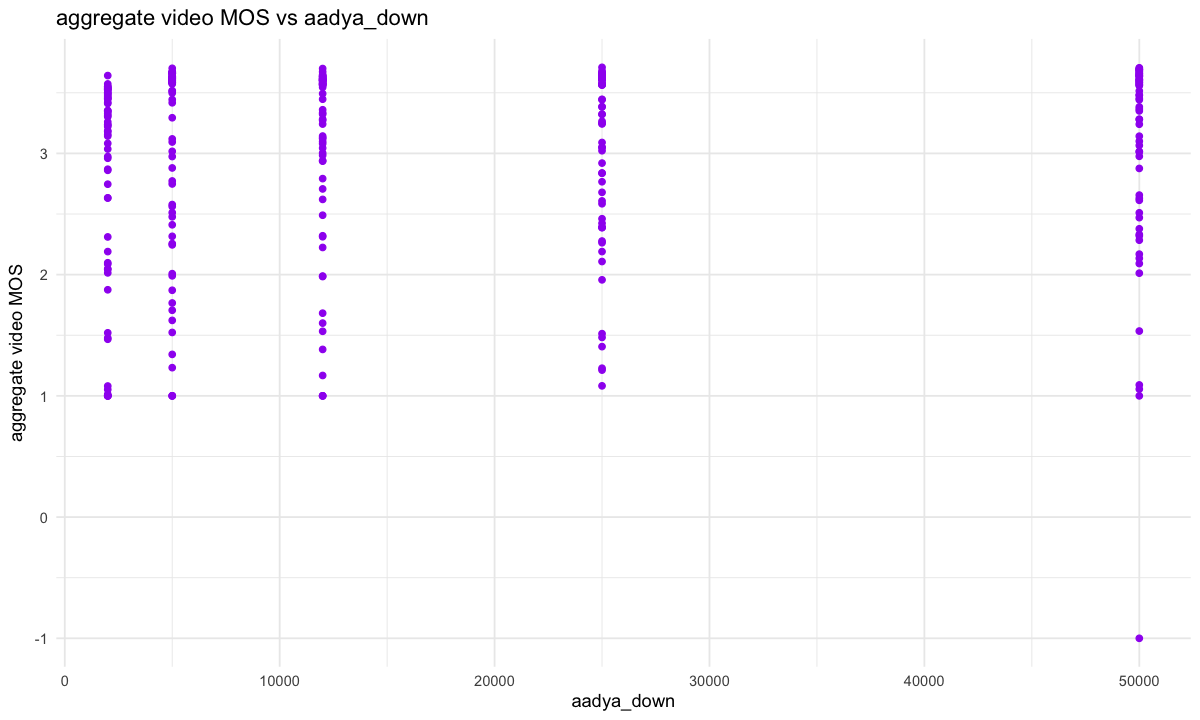

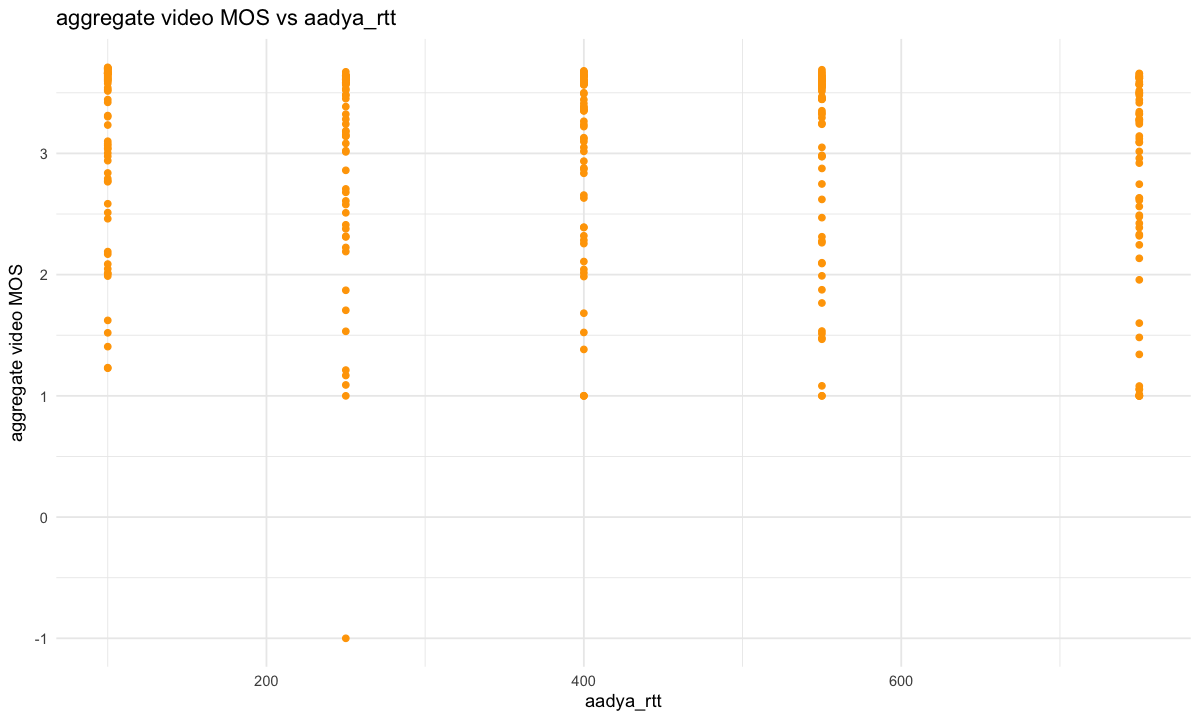


Call:
lm(formula = agg_video_MOS ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8087 -0.2111  0.0644  0.4250  1.2738 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.802e-01  2.274e-01   1.232    0.219    
log(aadya_up)  3.517e-01  2.655e-02  13.246   <2e-16 ***
aadya_down     3.006e-06  2.175e-06   1.382    0.168    
aadya_rtt     -4.196e-04  1.679e-04  -2.499    0.013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6592 on 296 degrees of freedom
Multiple R-squared:  0.3828,	Adjusted R-squared:  0.3766 
F-statistic:  61.2 on 3 and 296 DF,  p-value: < 2.2e-16


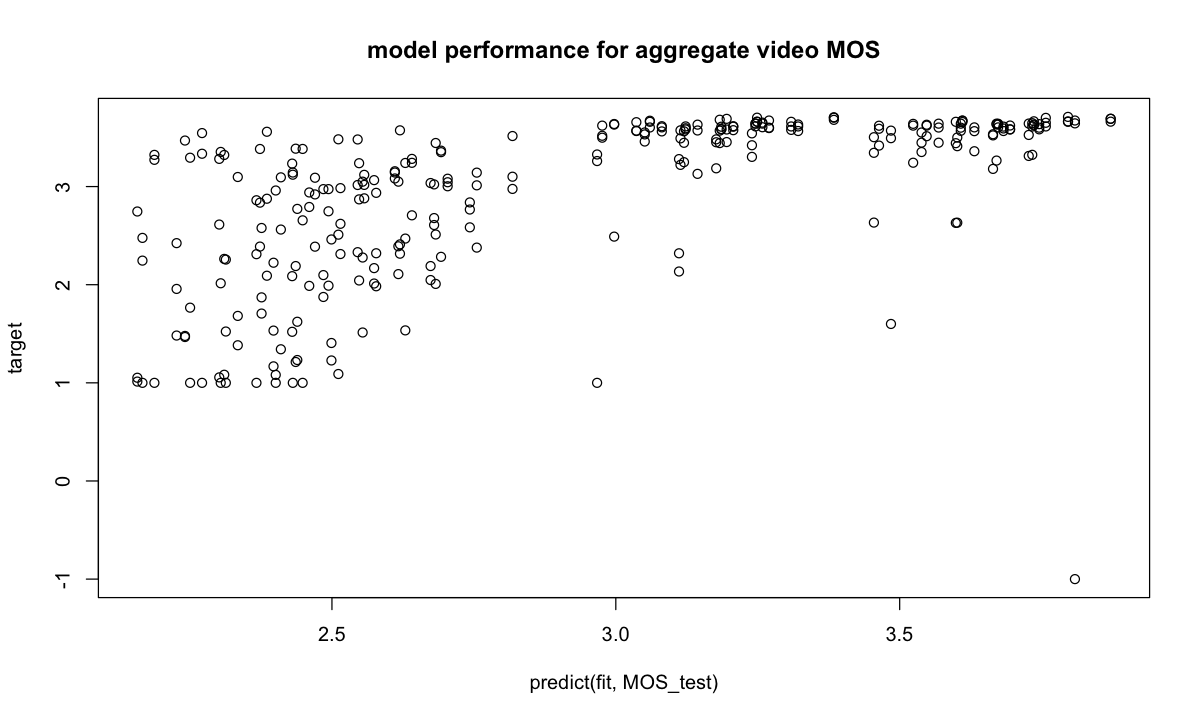

In [15]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")
log_fit <- lm(agg_video_MOS ~ log( aadya_up) + aadya_down + aadya_rtt, MOS_test)
summary(log_fit)


Call:
lm(formula = target ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61893 -0.24903  0.07983  0.35089  1.38937 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.711e+00  1.691e-01  16.034  < 2e-16 ***
log(aadya_up)  1.572e-01  1.976e-02   7.955 3.86e-14 ***
aadya_down     3.047e-06  1.622e-06   1.879   0.0613 .  
aadya_rtt     -2.540e-03  1.246e-04 -20.386  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4889 on 295 degrees of freedom
Multiple R-squared:  0.6197,	Adjusted R-squared:  0.6159 
F-statistic: 160.3 on 3 and 295 DF,  p-value: < 2.2e-16



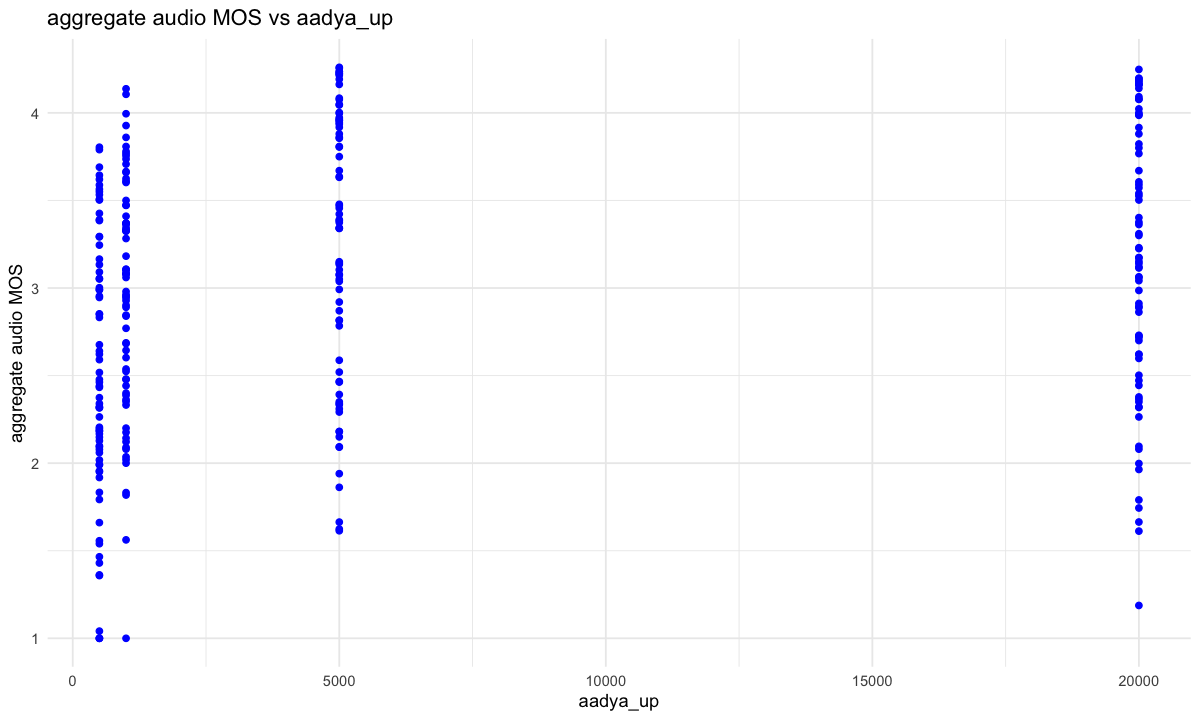

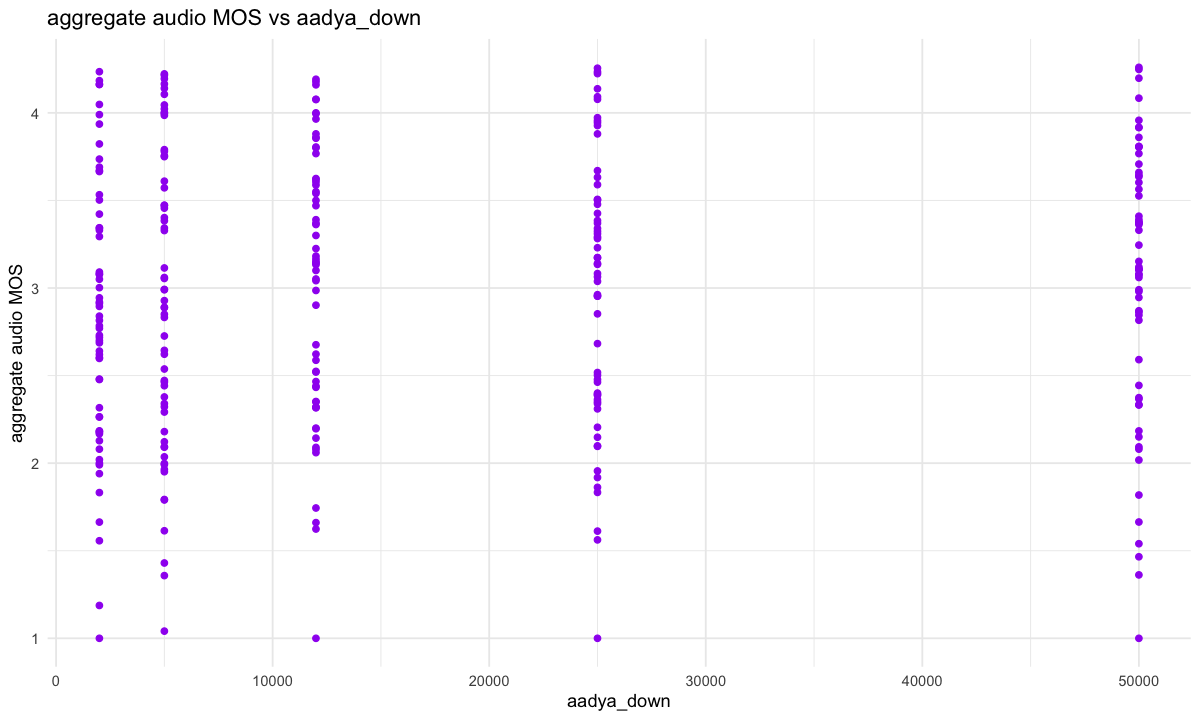

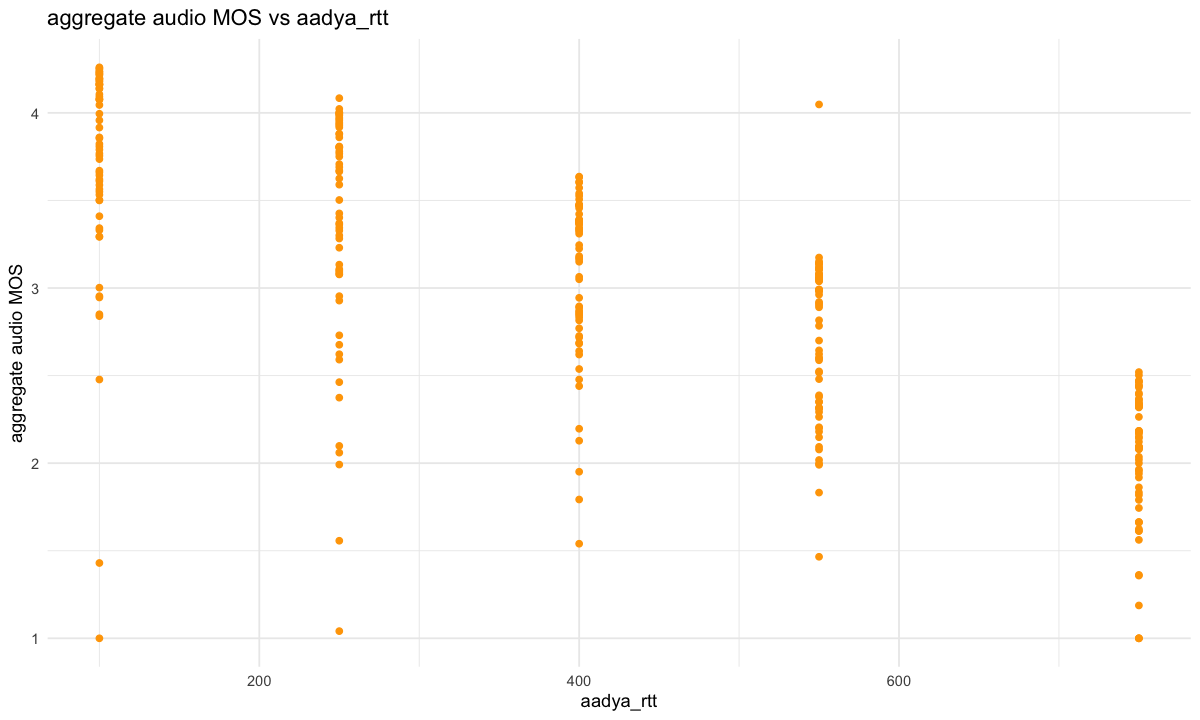

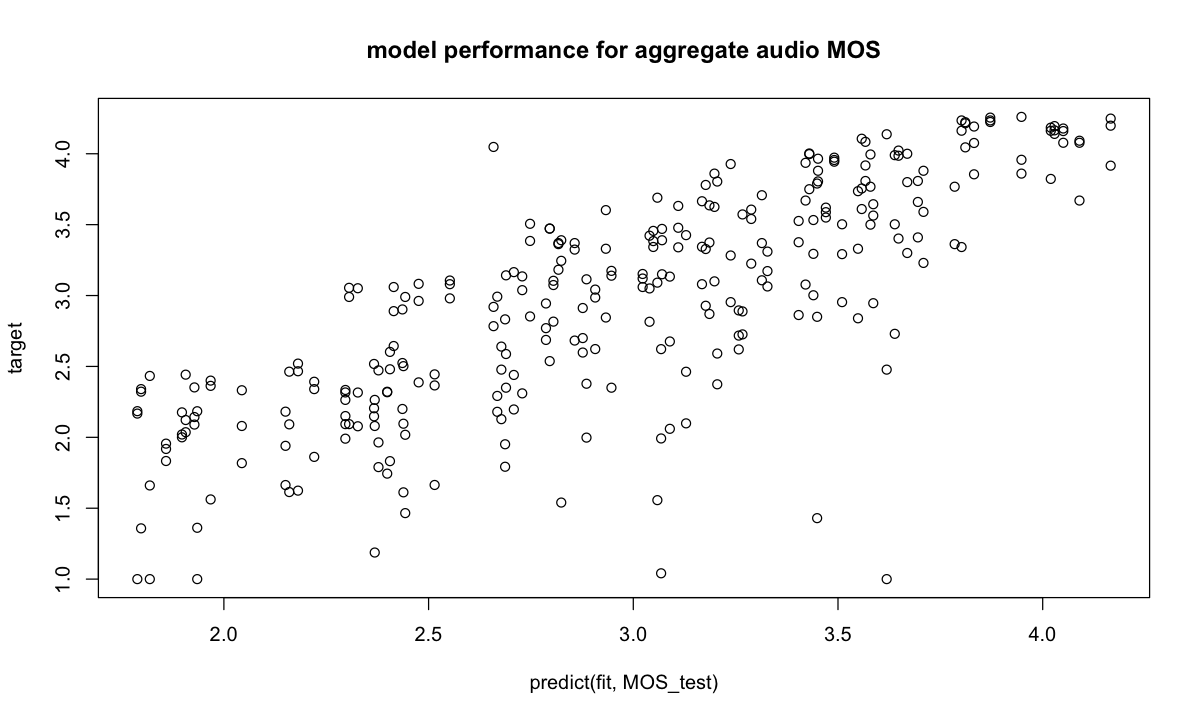

In [12]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6884 -0.1119  0.0675  0.2398  1.0940 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.772e+00  1.541e-01  24.484   <2e-16 ***
log(aadya_up)  3.485e-02  1.799e-02   1.937   0.0536 .  
aadya_down     2.034e-06  1.474e-06   1.380   0.1685    
aadya_rtt     -2.122e-03  1.137e-04 -18.653   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4467 on 296 degrees of freedom
Multiple R-squared:  0.5443,	Adjusted R-squared:  0.5397 
F-statistic: 117.9 on 3 and 296 DF,  p-value: < 2.2e-16



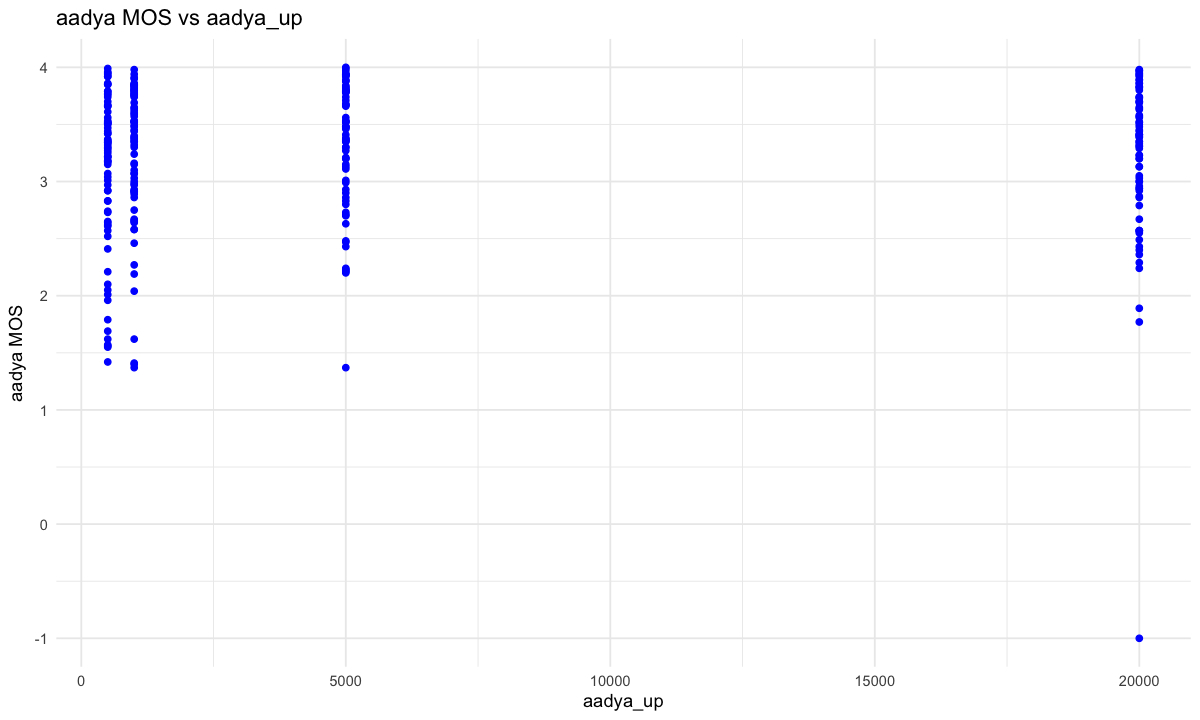

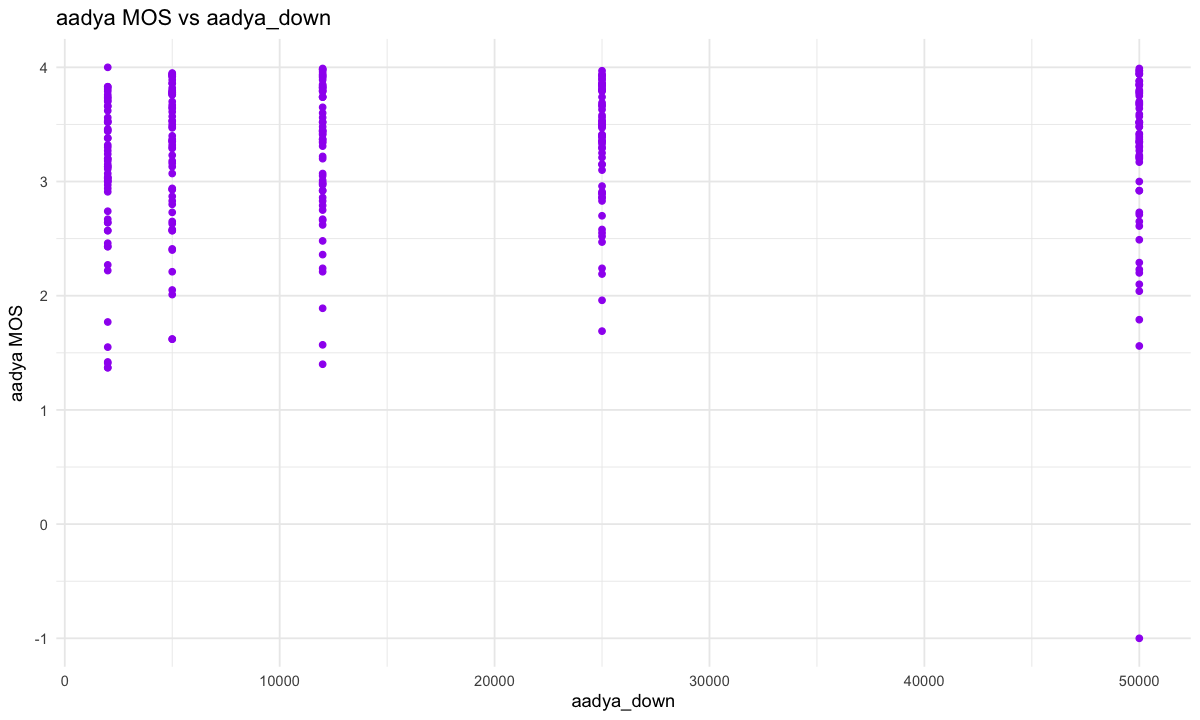

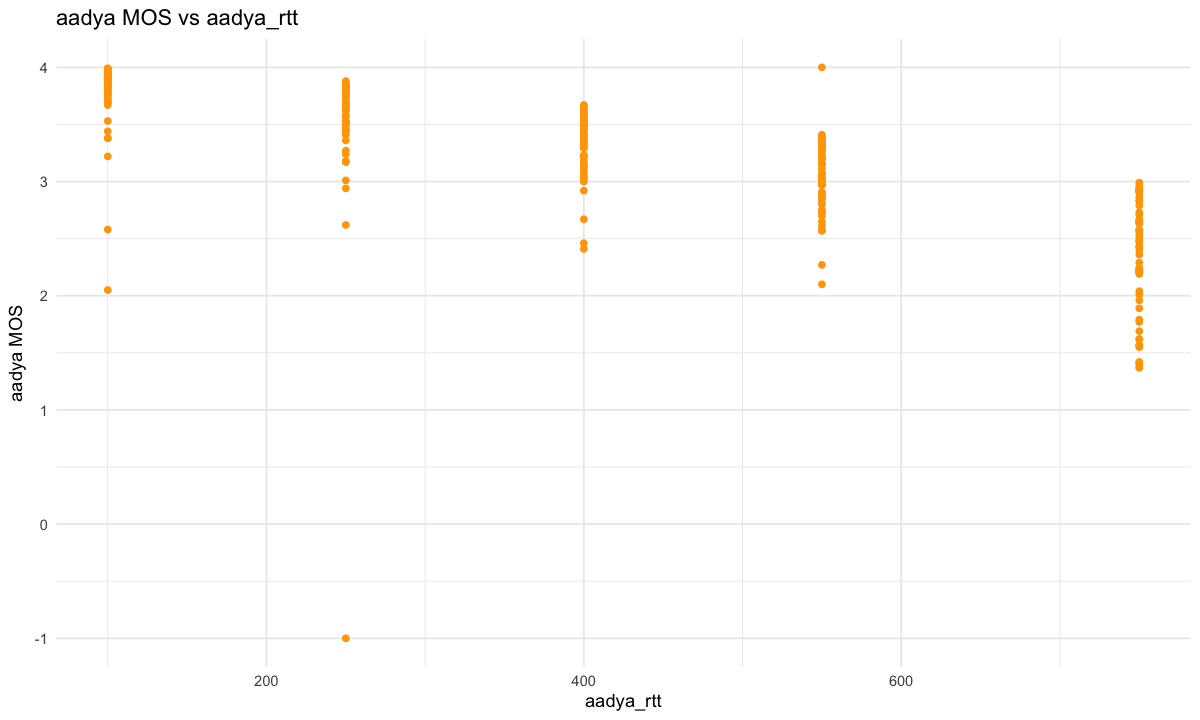

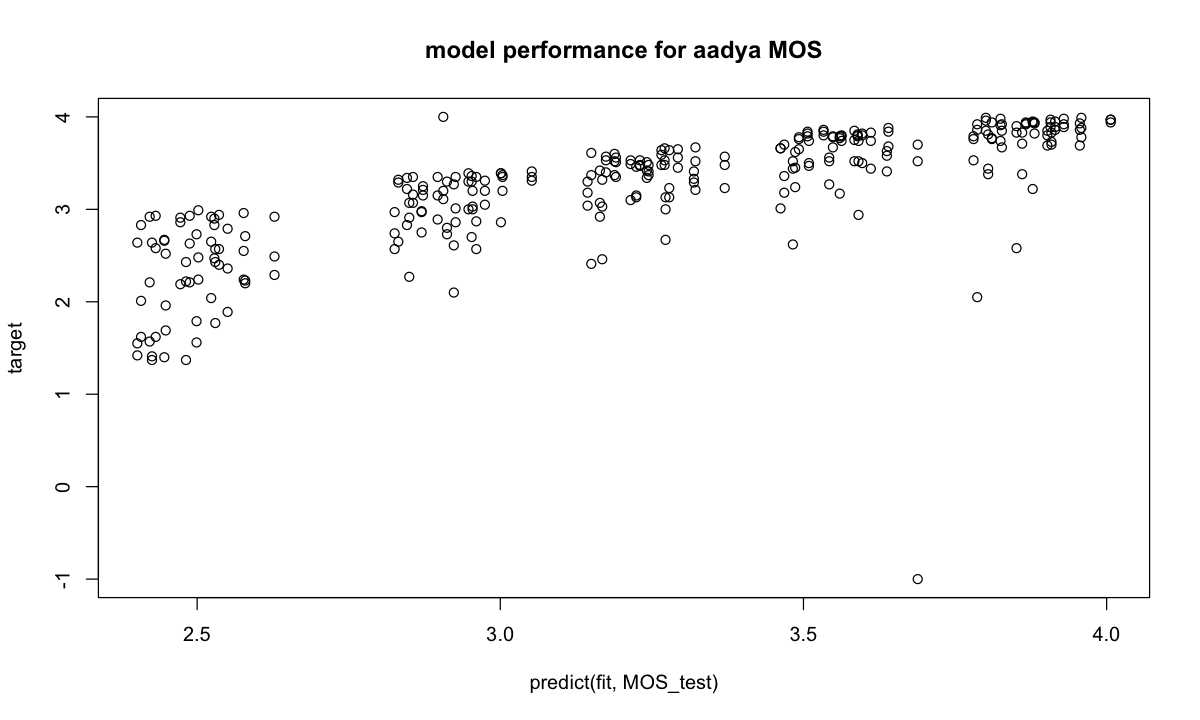

In [16]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")


Call:
lm(formula = target ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0648 -0.1989  0.0018  0.3832  1.0225 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.784e-01  2.007e-01   1.885   0.0604 .  
log(aadya_up) 3.672e-01  2.344e-02  15.665   <2e-16 ***
aadya_down    8.077e-07  1.920e-06   0.421   0.6743    
aadya_rtt     3.911e-05  1.482e-04   0.264   0.7921    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5819 on 296 degrees of freedom
Multiple R-squared:  0.4535,	Adjusted R-squared:  0.448 
F-statistic: 81.88 on 3 and 296 DF,  p-value: < 2.2e-16



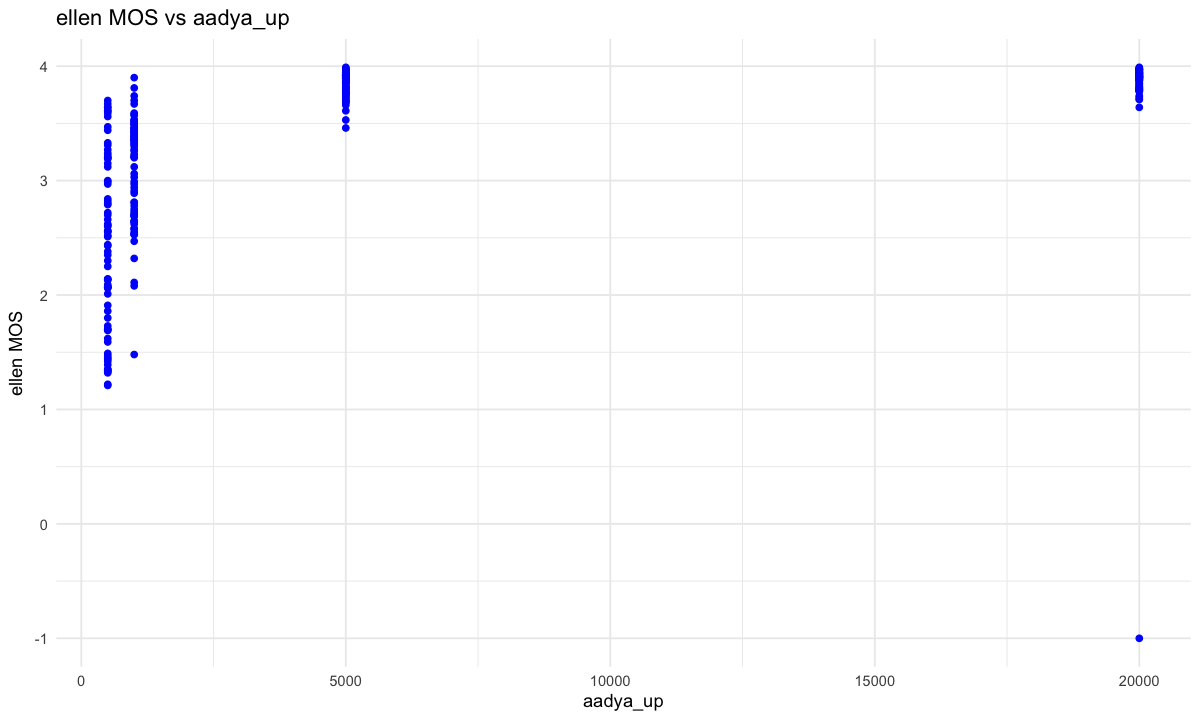

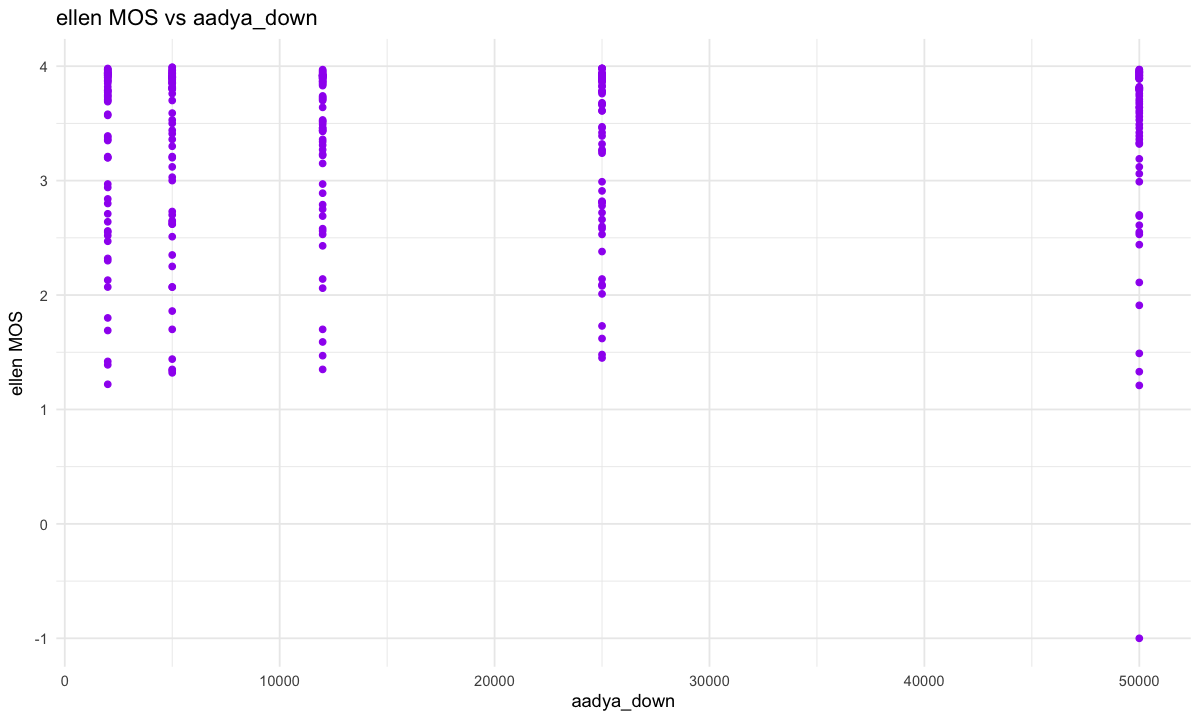

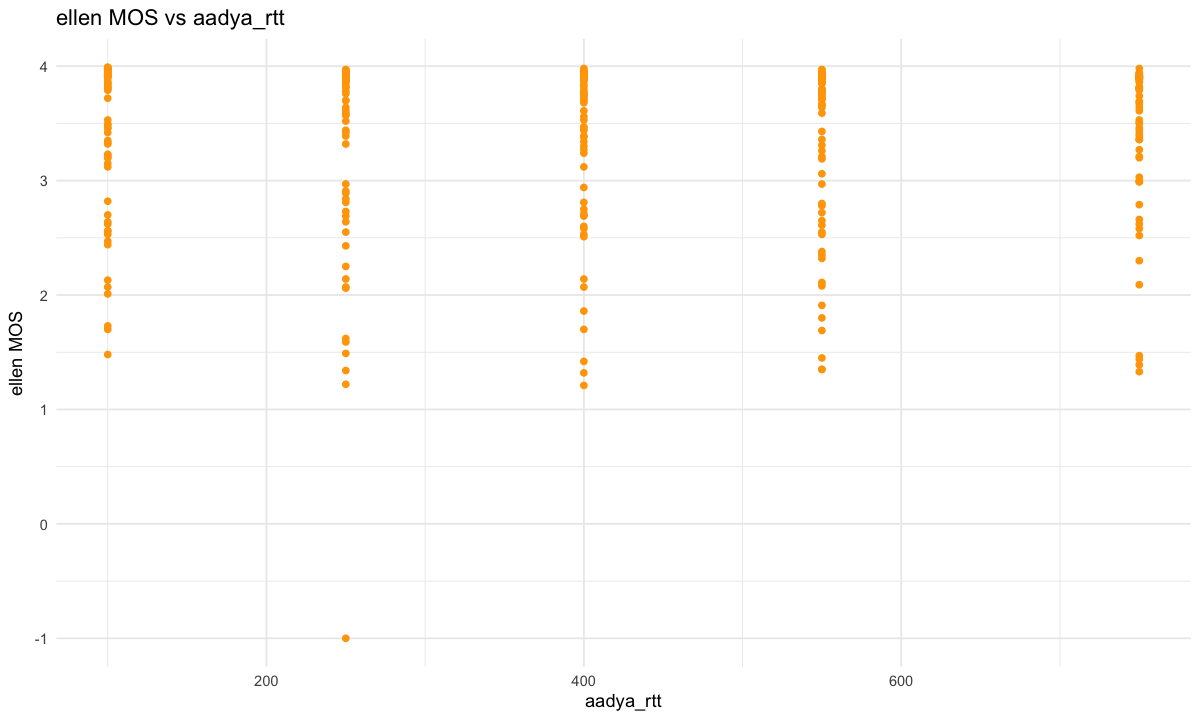

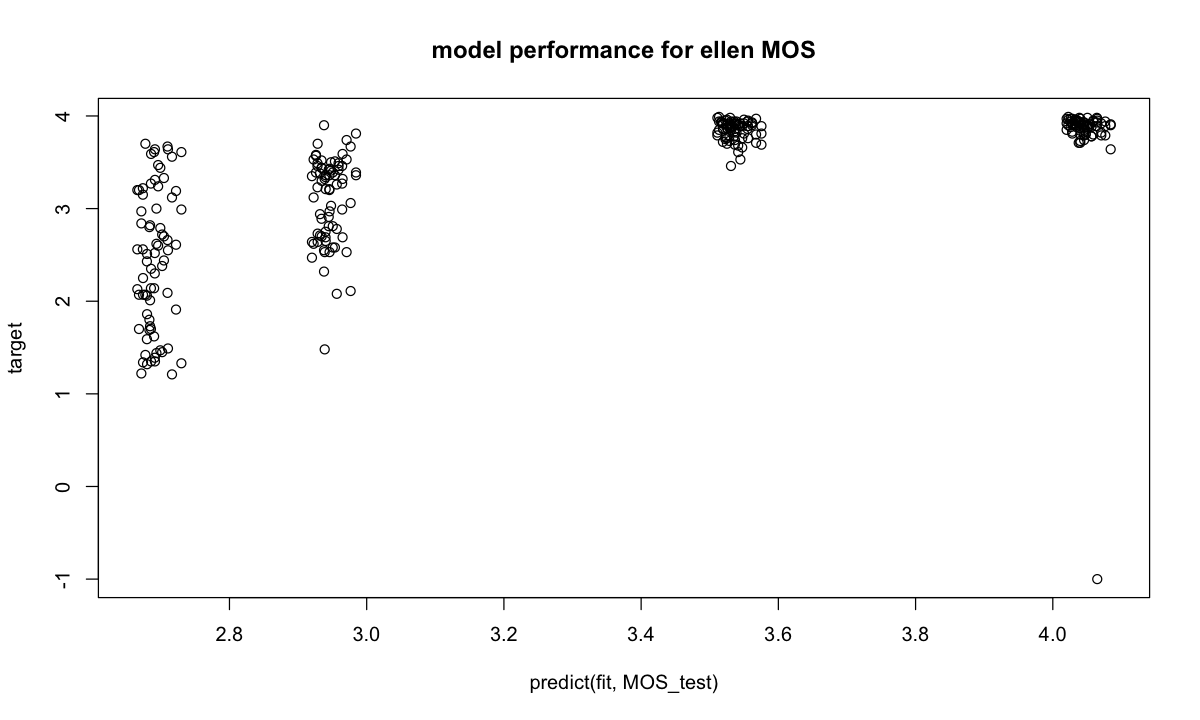

In [17]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")